In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('assets/Principal_Component_Analysis.csv')

In [9]:
df.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
38,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.180,2.69,1020
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.640,1.74,740
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.790,2.57,580
46,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.040,3.44,1065
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.450,2.23,355
128,2,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.890,2.78,342
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.890,2.87,1285
79,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.190,3.13,463


In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.xlabel("Wine Class", fontsize=16)
    plt.ylabel(c, fontsize=16)

corelation

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

normalizatoin / standardization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
y = df['Class']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.sample(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
110,-1.903071,1.260006,-1.997705,0.001518,0.509638,1.417883,0.552915,-0.981875,3.485073,-0.933525,-0.910151,0.280108,-0.588791
57,0.357463,-0.328857,1.145888,-0.809251,0.158572,1.129464,1.205493,-0.417829,0.121071,0.407442,0.493797,0.322481,1.665830
94,-1.705429,-0.310904,-0.316249,-0.448909,-0.122282,1.161510,0.231646,-1.545922,-0.422075,-0.782125,0.888658,0.491974,-1.279827
167,-0.223111,0.927871,-0.243142,0.001518,-0.824415,-1.306080,-1.374701,0.307374,-1.087867,2.250190,-1.041771,-1.217081,-0.197099
102,-0.816038,0.102021,0.341713,0.451946,-0.122282,0.424438,0.081051,-0.176095,-0.492158,-0.976782,-0.690784,1.085200,-0.983669
119,-1.236028,0.981731,-1.339744,-0.148624,-0.894628,-0.472868,-0.390814,0.065639,0.489009,-1.634288,-0.120430,0.619094,-0.582422
135,-0.494869,0.110998,-0.608676,-0.298767,-0.403135,-1.081754,-1.374701,2.160669,-1.140430,0.883269,-0.997898,-1.457197,-0.165254
73,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249
26,0.480990,-0.508390,0.926567,-1.019451,-0.473348,0.889114,0.914343,-0.176095,-0.246867,-0.111642,-0.164303,0.859210,1.426993
28,1.073917,-0.391694,1.584529,-0.028510,0.509638,1.049347,0.944462,0.065639,0.296279,-0.241413,1.283518,1.113449,0.535335


variance ratio

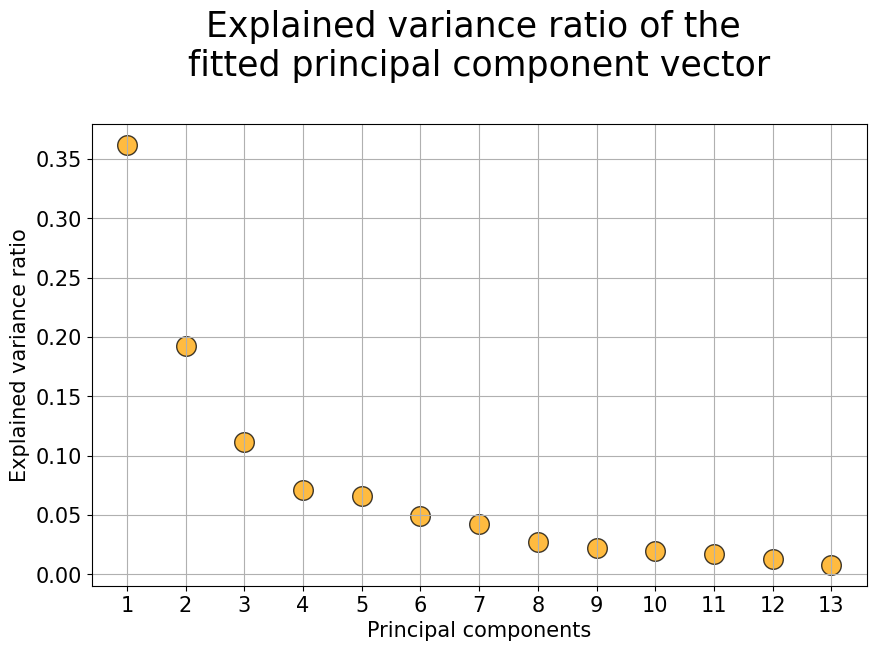

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the 1st
 principal component explains about 36% of the total variance in the data and the 2nd
 component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.

Transform the scaled data set using the fitted PCA object

In [14]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
128,-0.479565,1.938841,1.296508,0.686976,-0.060485,0.684161,-0.410576,-0.301098,0.415384,0.609290,0.059765,-0.612400,0.462270
163,-2.597497,-0.697966,-0.884940,-0.274229,0.772235,-0.719842,0.272500,0.260542,-0.339492,0.224802,-0.212659,-0.168802,0.057492
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866
54,2.146988,-1.016752,-0.957763,-0.240318,0.880105,-0.361775,-0.411948,0.289568,0.280537,0.454776,0.172427,0.178645,0.296116
103,-0.659795,2.679961,-0.764921,0.469955,0.144470,0.453647,-0.047669,0.443007,0.231322,-0.103370,0.675849,-0.567721,-0.229591
118,-2.433013,1.257141,-1.903027,0.869732,-0.468143,-0.827956,0.241943,0.637955,0.126745,0.174773,-0.325860,-0.302959,0.309316
104,0.392354,2.098732,-0.471850,0.437057,-0.303810,-0.249314,-0.453196,-0.399936,0.175357,0.739343,0.721456,0.511982,-0.128264
164,-2.949299,-1.555309,-0.983401,0.015480,-0.364082,0.491206,-0.985935,-0.785797,0.356328,0.007655,-0.073691,0.477745,0.101276
101,-0.549532,2.293129,-1.498935,-0.307039,0.326011,-0.150758,-0.411791,-0.799762,-0.051499,0.668451,-0.031049,0.122391,0.125721
19,2.084522,-1.061138,-0.164747,0.484997,0.882511,-1.393018,-0.102472,0.579915,0.058753,-0.150049,-0.835727,0.287875,0.058709


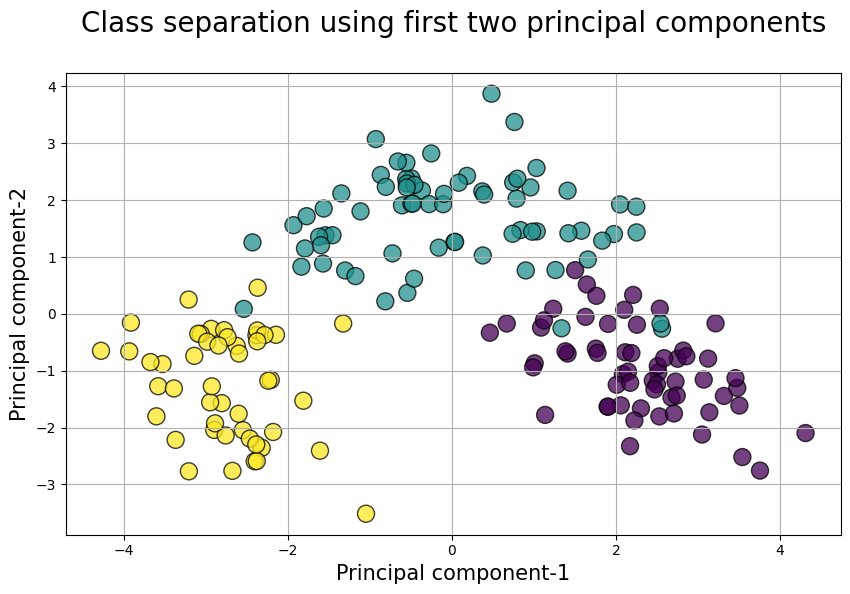

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [22]:
dfx_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
